In [ ]:
from copy import copy
import cv2
import numpy as np
import math
import pandas as pd

df= pd.read_csv("/content/drive/MyDrive/combined.csv")

print(df.shape)

df_mod= df.dropna()

col_name= np.array(df.columns)




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1247, 58395)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=np.array(df)
data_mod=np.array(df_mod)
print(len(data))
print(len(data_mod))

1247
726


In [ ]:
print(df_mod.shape)

label=np.zeros(len(data))
c=0
for i in range(len(data)):
    if df['ER_Status_nature2012'][i]=="Negative" and df['PR_Status_nature2012'][i]=="Negative" and df['HER2_Final_Status_nature2012'][i]=="Negative":
        label[i]=1
        c+=1

print(c)

label_mod=np.zeros(len(data_mod))
c=0
for i in range(len(data_mod)):
    if np.array(df_mod['ER_Status_nature2012'])[i]=="Negative" and np.array(df_mod['PR_Status_nature2012'])[i]=="Negative" and np.array(df_mod['HER2_Final_Status_nature2012'])[i]=="Negative":
        label_mod[i]=1
        c+=1

print(c)

df["Label"]=label
df_mod["Label"]=label_mod

print(df.shape)


(726, 58395)
123
118
(1247, 58396)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df.to_csv("/content/drive/MyDrive/data_labeled.csv")

In [ ]:
sheet= pd.read_excel("/content/drive/MyDrive/DatasetML/jpm-1069111-supplementary.xlsx")
features= sheet.iloc[:,0][1:]
print(features)
df1 = pd.DataFrame()
col_name= np.array(df_mod.columns)
for i in features:
    if i in col_name:
        df1[i]=df_mod[i]
        
df1["Label"]= label_mod
print(df1.shape)

1          ESR1
2          MLPH
3         FSIP1
4         C5AR2
5         GATA3
          ...  
13775      RTF2
13776    INAFM2
13777    NUP133
13778     ACTR2
13779     ALAS1
Name: Supplementary Table S1. A complete list of all the 5,502 significantly (P<0.05, |logFC|>1) differentially expressed genes, Length: 13779, dtype: object
(726, 12758)


In [ ]:
df_=df1
label=df_['Label'].to_numpy()
df_=df_.drop(df_.columns[-1],axis=1)
data=df_.to_numpy()
print(data.shape, label.shape)
print(data)

(726, 12757) (726,)
[[11.068778  9.816984  8.290019 ... 11.966505 13.329236 11.090774]
 [14.969342 14.999031 11.511753 ... 12.155767 14.499285 11.778488]
 [13.844608 14.234668 10.103288 ... 13.159871 14.300853 11.581201]
 ...
 [16.659689 14.610044 10.697836 ... 12.342353 14.310613 12.169925]
 [15.694902 13.190751 11.881114 ... 11.17555  14.542911 12.0182  ]
 [12.777872 12.556267  8.294621 ... 11.757807 13.979068 10.552669]]


In [ ]:
from sklearn.manifold import TSNE
print(data.shape)
tsne = TSNE()
out = tsne.fit_transform(data)

(726, 12757)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


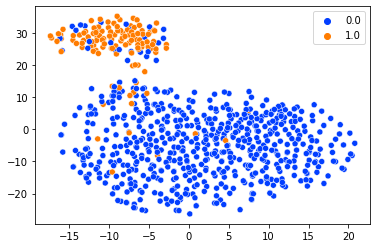

In [ ]:
# 2D Scatter Plot
import seaborn as sns
sns.scatterplot(out[:,0], out[:,1], hue=label, legend='full', palette=sns.color_palette('bright',2))

In [ ]:
from sklearn import preprocessing
data = preprocessing.scale(data)

In [ ]:
test_arr=[]
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso, LogisticRegression
from copy import copy
trainsize = int(data.shape[0]*0.9)

X_train = data[:trainsize,:]
X_test = data[trainsize:,:]

y_train = label[:trainsize]
y_test = label[trainsize:]

clf = LogisticRegression()
clf.fit(X_train,y_train)
print('Logistic Regression')
print('Train:',clf.score(X_train, y_train))
print('Test:',clf.score(X_test, y_test))
test_arr.append(['Logistic Regression', clf.score(X_test, y_test)])
print('Confusion Matrix:')
conf_matx= confusion_matrix(y_test,clf.predict(X_test))
print(conf_matx)
print()
print('False Positives:', conf_matx[0][1]/(conf_matx[0][0]+conf_matx[0][1]))
print('False Negatives:', conf_matx[1][0]/(conf_matx[1][0]+conf_matx[1][1]))
print('Recall:', conf_matx[0][0]/(conf_matx[0][0]+conf_matx[1][0]))
print('Specificity:', conf_matx[1][1]/(conf_matx[1][1]+conf_matx[0][1]))
print()

Logistic Regression
Train: 1.0
Test: 0.8904109589041096
Confusion Matrix:
[[54  2]
 [ 6 11]]

False Positives: 0.03571428571428571
False Negatives: 0.35294117647058826
Recall: 0.9
Specificity: 0.8461538461538461



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm
#X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=111)
clf = svm.SVC()
clf.fit(X_train,y_train)
print('SVM')
print('Train:',clf.score(X_train, y_train))
print('Test:',clf.score(X_test, y_test))
test_arr.append(['SVM', clf.score(X_test, y_test)])

print('Confusion Matrix:')
conf_matx= confusion_matrix(y_test,clf.predict(X_test))
print(conf_matx)
print()
print('False Positives:', conf_matx[0][1]/(conf_matx[0][0]+conf_matx[0][1]))
print('False Negatives:', conf_matx[1][0]/(conf_matx[1][0]+conf_matx[1][1]))
print('Recall:', conf_matx[0][0]/(conf_matx[0][0]+conf_matx[1][0]))
print('Specificity:', conf_matx[1][1]/(conf_matx[1][1]+conf_matx[0][1]))

SVM
Train: 0.9846860643185299
Test: 0.863013698630137
Confusion Matrix:
[[54  2]
 [ 8  9]]

False Positives: 0.03571428571428571
False Negatives: 0.47058823529411764
Recall: 0.8709677419354839
Specificity: 0.8181818181818182


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm
#X_train, X_test, y_train, y_test = train_test_split(data_mod, label, test_size=0.2, random_state=111)
clf = svm.LinearSVC()
clf.fit(X_train,y_train)
print('Linear SVC')
print('Train:',clf.score(X_train, y_train))
print('Test:',clf.score(X_test, y_test))
test_arr.append(['Linear SVC', clf.score(X_test, y_test)])

print('Confusion Matrix:')
conf_matx= confusion_matrix(y_test,clf.predict(X_test))
print(conf_matx)
print()
print('False Positives:', conf_matx[0][1]/(conf_matx[0][0]+conf_matx[0][1]))
print('False Negatives:', conf_matx[1][0]/(conf_matx[1][0]+conf_matx[1][1]))
print('Recall:', conf_matx[0][0]/(conf_matx[0][0]+conf_matx[1][0]))
print('Specificity:', conf_matx[1][1]/(conf_matx[1][1]+conf_matx[0][1]))


Linear SVC
Train: 1.0
Test: 0.7671232876712328
Confusion Matrix:
[[40 16]
 [ 1 16]]

False Positives: 0.2857142857142857
False Negatives: 0.058823529411764705
Recall: 0.975609756097561
Specificity: 0.5


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=111)
clf = GaussianNB()
clf.fit(X_train,y_train)
print('Naive Bayes')
print('Train:',clf.score(X_train, y_train))
print('Test:',clf.score(X_test, y_test))
print()
test_arr.append(['Naive Bayes', clf.score(X_test, y_test)])

print('Confusion Matrix:')
conf_matx= confusion_matrix(y_test,clf.predict(X_test))
print(conf_matx)
print()
print('False Positives:', conf_matx[0][1]/(conf_matx[0][0]+conf_matx[0][1]))
print('False Negatives:', conf_matx[1][0]/(conf_matx[1][0]+conf_matx[1][1]))
print('Recall:', conf_matx[0][0]/(conf_matx[0][0]+conf_matx[1][0]))
print('Specificity:', conf_matx[1][1]/(conf_matx[1][1]+conf_matx[0][1]))

Naive Bayes
Train: 0.9310872894333844
Test: 0.9452054794520548

Confusion Matrix:
[[54  2]
 [ 2 15]]

False Positives: 0.03571428571428571
False Negatives: 0.11764705882352941
Recall: 0.9642857142857143
Specificity: 0.8823529411764706


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
#X_train, X_test, y_train, y_test = train_test_split(data_mod, label, test_size=0.2, random_state=111)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
print('RandomForest Classifier')
print('Train:',clf.score(X_train, y_train))
print('Test:',clf.score(X_test, y_test))
test_arr.append(['RandomForest', clf.score(X_test, y_test)])

print()
print('Confusion Matrix:')
conf_matx= confusion_matrix(y_test,clf.predict(X_test))
print(conf_matx)
print('False Positives:', conf_matx[0][1]/(conf_matx[0][0]+conf_matx[0][1]))
print('False Negatives:', conf_matx[1][0]/(conf_matx[1][0]+conf_matx[1][1]))
print('Recall:', conf_matx[0][0]/(conf_matx[0][0]+conf_matx[1][0]))
print('Specificity:', conf_matx[1][1]/(conf_matx[1][1]+conf_matx[0][1]))


RandomForest Classifier
Train: 1.0
Test: 0.9178082191780822

Confusion Matrix:
[[54  2]
 [ 4 13]]
False Positives: 0.03571428571428571
False Negatives: 0.23529411764705882
Recall: 0.9310344827586207
Specificity: 0.8666666666666667


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
print('Decision Tree')
print('Train:',clf.score(X_train, y_train))
print('Test:',clf.score(X_test, y_test))
test_arr.append(['Decision Tree', clf.score(X_test, y_test)])

print()
print('Confusion Matrix:')
conf_matx= confusion_matrix(y_test,clf.predict(X_test))
print(conf_matx)
print('False Positives:', conf_matx[0][1]/(conf_matx[0][0]+conf_matx[0][1]))
print('False Negatives:', conf_matx[1][0]/(conf_matx[1][0]+conf_matx[1][1]))
print('Recall:', conf_matx[0][0]/(conf_matx[0][0]+conf_matx[1][0]))
print('Specificity:', conf_matx[1][1]/(conf_matx[1][1]+conf_matx[0][1]))


Decision Tree
Train: 1.0
Test: 0.8904109589041096

Confusion Matrix:
[[54  2]
 [ 6 11]]
False Positives: 0.03571428571428571
False Negatives: 0.35294117647058826
Recall: 0.9
Specificity: 0.8461538461538461


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
clf.fit(X_train,y_train)
print('kNN')
print('Train:',clf.score(X_train, y_train))
print('Test:',clf.score(X_test, y_test))
test_arr.append(['kNN', clf.score(X_test, y_test)])

print()
print('Confusion Matrix:')
conf_matx= confusion_matrix(y_test,clf.predict(X_test))
print(conf_matx)
print('False Positives:', conf_matx[0][1]/(conf_matx[0][0]+conf_matx[0][1]))
print('False Negatives:', conf_matx[1][0]/(conf_matx[1][0]+conf_matx[1][1]))
print('Recall:', conf_matx[0][0]/(conf_matx[0][0]+conf_matx[1][0]))
print('Specificity:', conf_matx[1][1]/(conf_matx[1][1]+conf_matx[0][1]))


kNN
Train: 0.9448698315467075
Test: 0.9178082191780822

Confusion Matrix:
[[54  2]
 [ 4 13]]
False Positives: 0.03571428571428571
False Negatives: 0.23529411764705882
Recall: 0.9310344827586207
Specificity: 0.8666666666666667


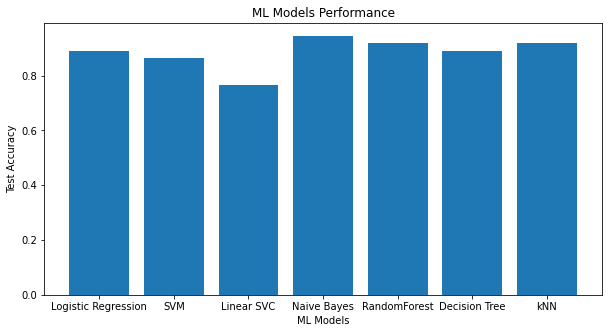

In [ ]:
model=[]
acc=[]
for t in test_arr:
    model.append(t[0])
    acc.append(t[1])

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))

plt.bar(model, acc)
plt.ylabel("Test Accuracy")
plt.xlabel("ML Models")
plt.title("ML Models Performance")
plt.show()